# Approach 1: SVM
## Application: Build a classifier model based on SVM algorithm to predict whether a user likes or dislikes a movie.

#### Learning Outcomes

+ Data cleaning
+ Exploratory data analysis
+ Feature preprocessing
+ Support vector machine

## Importing the required libraries

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
warnings.filterwarnings('ignore')
%matplotlib inline

## Loading Dataset

<span style="color: blue;">Part 1:</span> Load the data about movies <code>u.item</code> into a Pandas dataframe. 

In [2]:
movies = pd.read_csv('data/u.item', sep='|', header=None, encoding='latin1', index_col=False,
                     names=['movie_id',
                            'movie_title',
                            'release_date',
                            'video_release_date',
                            'imdb_url',
                            'unknown',
                            'action',
                            'adventure',
                            'animation',
                            'children',
                            'comedy',
                            'crime',
                            'documentary',
                            'drama',
                            'fantasy',
                            'film_noir',
                            'horror',
                            'musical',
                            'mystery',
                            'romance',
                            'sci_fi',
                            'thriller',
                            'war',
                            'western'])
movies.shape

(1682, 24)

In [3]:
movies.head()

,movie_id,movie_title,release_date,video_release_date,imdb_url,unknown,action,adventure,animation,children,...,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


<span style="color: blue">Part 2: </span> Load the `u.data` data in `ratings` variable and print its shape.

Use `header = None` with the column names 'user_id','movie_id','rating','timestamp'.

In [4]:
ratings = pd.read_csv('data/u.data', sep='\t', header=None, names=['user_id','movie_id','rating','timestamp'])
ratings.shape

(100000, 4)

In [5]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


<span style="color: blue">Part 3: </span> Load the `u.user` data in `users` variable and print its shape.

Use `header = None` with the column names 'user_id','age','gender','occupation', 'zip'.

In [6]:
users = pd.read_csv('data/u.user', sep='|', header=None, encoding='latin1', index_col=False,
                     names=['user_id','age','gender','occupation', 'zip'])
users.shape

(943, 5)

In [7]:
users.head()

,user_id,age,gender,occupation,zip
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


<span style="color: blue">Part 4: </span> Load the `ua.train` data in `ratings_train` variable; `ua.test` data in `ratings_test` variable and print its shape.

Use `header = None` with the column names 'user_id','movie_id','rating','timestamp'.

In [8]:
ratings_train = pd.read_csv('data/ua.train', sep='\t', header=None, names=['user_id','movie_id','rating','timestamp'])
ratings_train.shape

(90570, 4)

In [9]:
ratings_train.head()

,user_id,movie_id,rating,timestamp
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712


In [10]:
ratings_test = pd.read_csv('data/ua.test', sep='\t', header=None, names=['user_id','movie_id','rating','timestamp'])
ratings_test.shape

(9430, 4)

In [11]:
ratings_test.head()

,user_id,movie_id,rating,timestamp
0,1,20,4,887431883
1,1,33,4,878542699
2,1,61,4,878542420
3,1,117,3,874965739
4,1,155,2,878542201


## Data Cleaning

<span style="color: blue;">Part 1:</span> Generate a list of columns with missing values in the <code>ratings</code>, <code>movies</code>, and <code>users</code> dataset, along with their respective counts, sorted in descending order.

In [12]:
ratings.isnull().sum().sort_values(ascending=False)

user_id      0
movie_id     0
rating       0
timestamp    0
dtype: int64

In [13]:
movies.isnull().sum().sort_values(ascending=False)

video_release_date    1682
imdb_url                 3
release_date             1
movie_id                 0
fantasy                  0
war                      0
thriller                 0
sci_fi                   0
romance                  0
mystery                  0
musical                  0
horror                   0
film_noir                0
documentary              0
drama                    0
movie_title              0
crime                    0
comedy                   0
children                 0
animation                0
adventure                0
action                   0
unknown                  0
western                  0
dtype: int64

In [14]:
users.isnull().sum().sort_values(ascending=False)

user_id       0
age           0
gender        0
occupation    0
zip           0
dtype: int64

💡 <b>video_release_date</b> in <code>movies</code> dataset have the most missing values (1682 rows). We decided to drop this column, because it is not an important source of information in predicting whether a user likes or dislikes a movie.

In [15]:
movies = movies.drop(['video_release_date'], axis=1)
movies.head()

,movie_id,movie_title,release_date,imdb_url,unknown,action,adventure,animation,children,comedy,...,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
0,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


💡 <b>release_date</b> in <code>movies</code> dataset have 1 missing values. We now print out this row to check.

In [16]:
movies_with_null_release_date = movies[movies['release_date'].isnull()]

# Print the movie titles
print(movies_with_null_release_date)

     movie_id movie_title release_date imdb_url  unknown  action  adventure  \
266       267     unknown          NaN      NaN        1       0          0   

     animation  children  comedy  ...  fantasy  film_noir  horror  musical  \
266          0         0       0  ...        0          0       0        0   

     mystery  romance  sci_fi  thriller  war  western  
266        0        0       0         0    0        0  

[1 rows x 23 columns]


As we can see, this row does not carry any information as its movie_title and genre information are all unknown. Therefore we decided to fill in the column of release date with a common value - 01-Jan-1995. 

In [17]:
movies.loc[movies['movie_id'] == 267, 'release_date'] = '01-Jan-1995'


<span style="color: blue;">Part 2:</span> Identify and remove columns with no meanings or contribution to prediction

<b>imdb_url</b> column in <code>movies</code>, <b>zip</b> column in <code>users</code> and <b>timestamp</b> column in <code>ratings</code> are technical data records without much information and they do not significantly contribute to the variability of the data. Therefore we decided to remove these columns from the respective dataframes. 


In [18]:
movies = movies.drop('imdb_url', axis=1)
movies.head()

,movie_id,movie_title,release_date,unknown,action,adventure,animation,children,comedy,crime,...,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
0,1,Toy Story (1995),01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [19]:
users = users.drop('zip', axis=1)
users.head()

,user_id,age,gender,occupation
0,1,24,M,technician
1,2,53,F,other
2,3,23,M,writer
3,4,24,M,technician
4,5,33,F,other


In [20]:
ratings = ratings.drop('timestamp', axis=1)
ratings.head()

,user_id,movie_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


We will apply all data-cleaning done on <code>ratings</code> to both <code>ratings_train</code> and <code>ratings_test</code> for consistency. 

In [21]:
ratings_train = ratings_train.drop('timestamp', axis=1)
ratings_test = ratings_test.drop('timestamp', axis=1)

## Pre-processing

<span style="color: blue;">Part 1:</span> Examine and pre-process columns in the  <code>users</code> dataset. <br><br>
<b>1.</b> First we will look at the age column. Print out the range of ages in the dataset. 

In [22]:
age_range = (users['age'].min(), users['age'].max())

print("Age Range: {} to {}".format(age_range[0], age_range[1]))

Age Range: 7 to 73


Based on the above age range (7-73), we can conclude that all entries in the age column are reasonable and there is no abnormality. We will then break down this age range to 6 categories. 

In [23]:
def categorise_age(age):
    if age < 20:
        return "below 20"
    elif age <= 30:
        return "21-30"
    elif age <= 40:
        return "31-40"
    elif age <= 50:
        return "41-50"
    elif age <= 60:
        return "51-60"
    else:
        return "above 60"

users['age'] = users['age'].apply(categorise_age)

users.head()


,user_id,age,gender,occupation
0,1,21-30,M,technician
1,2,51-60,F,other
2,3,21-30,M,writer
3,4,21-30,M,technician
4,5,31-40,F,other


<b>2.</b> Secondly, we will look at the occupation column. Print out all unique occupations given in <code>u.occupation</code>. 

In [24]:
occupations = pd.read_csv("data/u.occupation", header=None, names = ['occupation'])

occupations

,occupation
0,administrator
1,artist
2,doctor
3,educator
4,engineer
5,entertainment
6,executive
7,healthcare
8,homemaker
9,lawyer


In [25]:
print("Total number of unique occupations amongst all users: ", len(occupations))

Total number of unique occupations amongst all users:  21


Since there are 21 unique occupations and this is a bit too many and not ideal for encoding and training for SVM, we will categorise the 21 occupations into 6 categories. 

In [26]:
def categorise_occupation(occ):
    if occ in ['doctor', 'healthcare']:
        return 'Healthcare'
    elif occ in ['educator', 'librarian', 'student', 'scientist']:
        return 'Education and Research'
    elif occ in ['administrator', 'executive', 'lawyer', 'marketing', 'salesman']:
        return 'Business and Law'
    elif occ in ['engineer', 'programmer', 'technician']:
        return 'Technology'
    elif occ in ['artist', 'entertainment', 'writer']:
        return 'Arts'
    else:
        return 'Miscellaneous'

users['occupation'] = users['occupation'].apply(categorise_occupation)

users.head()

,user_id,age,gender,occupation
0,1,21-30,M,Technology
1,2,51-60,F,Miscellaneous
2,3,21-30,M,Arts
3,4,21-30,M,Technology
4,5,31-40,F,Miscellaneous


After we have broken down the age category and the occupation category to maintain its information whilst reducing dimensionality, we can encode the categorical features in this dataframe for training of SVM model later. 

In [27]:
users_encoded = pd.get_dummies(users, columns=['age', 'gender', 'occupation'])

users_encoded.head()

,user_id,age_21-30,age_31-40,age_41-50,age_51-60,age_above 60,age_below 20,gender_F,gender_M,occupation_Arts,occupation_Business and Law,occupation_Education and Research,occupation_Healthcare,occupation_Miscellaneous,occupation_Technology
0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1
1,2,0,0,0,1,0,0,1,0,0,0,0,0,1,0
2,3,1,0,0,0,0,0,0,1,1,0,0,0,0,0
3,4,1,0,0,0,0,0,0,1,0,0,0,0,0,1
4,5,0,1,0,0,0,0,1,0,0,0,0,0,1,0


<span style="color: blue;">Part 2:</span> Examine and pre-process columns in the  <code>movies</code> dataset. <br><br>
<b>1.</b> First we will look at the <b>release_date</b> column. Convert it into a date-time object and print out the range of years in the release_date. 

In [28]:
movies['release_date'] = pd.to_datetime(movies['release_date'])
movies['release_year'] = movies['release_date'].dt.year

release_year_range = (movies['release_year'].min(), movies['release_year'].max())

print("Release year range: {} to {}".format(release_year_range[0], release_year_range[1]))

Release year range: 1922 to 1998


Therefore in order to preserve the information of release_date whilst still keeping the dataframe from being too sparse, we will categorise the release years by decades. 

In [29]:
def categorise_release_year(year):
    if year < 1960:
        return "1920s-1950s"
    elif year < 1990:
        return "1960s-1980s"
    else:
        return "1990s"

movies['release_year'] = movies['release_year'].apply(categorise_release_year)
movies = movies.drop(['release_date'], axis=1)
movies.head()

,movie_id,movie_title,unknown,action,adventure,animation,children,comedy,crime,documentary,...,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western,release_year
0,1,Toy Story (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1990s
1,2,GoldenEye (1995),0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1990s
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1990s
3,4,Get Shorty (1995),0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1990s
4,5,Copycat (1995),0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1990s


Since the genre columns in <code>movies</code> dataframe are already encoded, no further pre-processing would be required. <br><br>
After we have broken down the release_year category to maintain its information whilst reducing dimensionality, we can encode the categorical features in this dataframe for training of SVM model later. 

In [30]:
movies_encoded = pd.get_dummies(movies, columns=['release_year'])

movies_encoded.head()

,movie_id,movie_title,unknown,action,adventure,animation,children,comedy,crime,documentary,...,musical,mystery,romance,sci_fi,thriller,war,western,release_year_1920s-1950s,release_year_1960s-1980s,release_year_1990s
0,1,Toy Story (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,GoldenEye (1995),0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,4,Get Shorty (1995),0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,Copycat (1995),0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1


<span style="color: blue;">Part 3:</span> Examine and pre-process columns in the  <code>ratings</code> dataset. <br><br>
<b>1.</b> We will look at the rating column. We will categorise the numerical ratings (1-5) into <b>like</b> or <b>dislike</b>. 

In [31]:
ratings['rating'] = ratings['rating'].apply(lambda x: 1 if x in [4, 5] else 0)

ratings.head()

,user_id,movie_id,rating
0,196,242,0
1,186,302,0
2,22,377,0
3,244,51,0
4,166,346,0


<b>2.</b> We will apply the same categorisation to <code>ua.train</code> and <code>ua.test</code>. 

In [32]:
ratings_train['rating'] = ratings_train['rating'].apply(lambda x: 1 if x in [4, 5] else 0)

ratings_train.head()

,user_id,movie_id,rating
0,1,1,1
1,1,2,0
2,1,3,1
3,1,4,0
4,1,5,0


In [33]:
ratings_test['rating'] = ratings_test['rating'].apply(lambda x: 1 if x in [4, 5] else 0)

ratings_test.head()

,user_id,movie_id,rating
0,1,20,1
1,1,33,1
2,1,61,1
3,1,117,0
4,1,155,0


<b>3.</b> We will examine the distribution of <b>like</b> v.s. <b>dislike</b> in both train and test datasets <code>ua.train</code> and <code>ua.test</code>. 

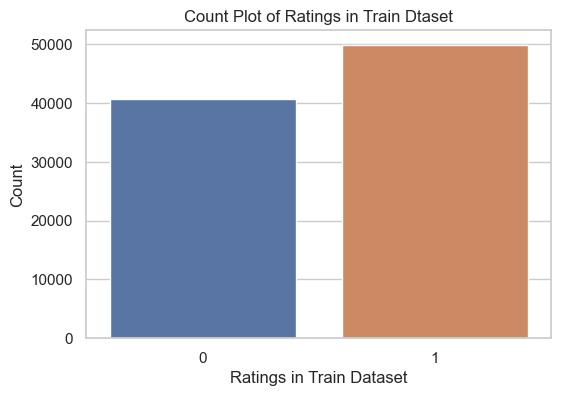

In [34]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(x='rating', data=ratings_train)

plt.xlabel('Ratings in Train Dataset')
plt.ylabel('Count')

plt.title('Count Plot of Ratings in Train Dtaset')

plt.show()

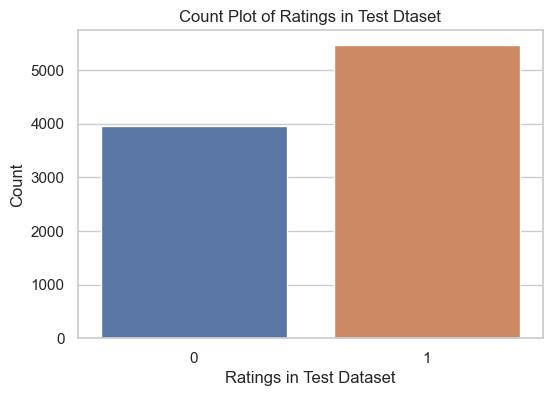

In [35]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(x='rating', data=ratings_test)

plt.xlabel('Ratings in Test Dataset')
plt.ylabel('Count')

plt.title('Count Plot of Ratings in Test Dtaset')

plt.show()

From the plots above, we can see that overall, the distribution between <b>like</b> and <b>dislike</b> is largely balanced, although more leaning towards like for both Train and Test datasets. 

<span style="color: blue;">Part 4:</span> Merge columns in the <code>users</code>, <code>movies</code> and <code>ratings</code> dataframes based on <b>user_id</b> and <b>movie_id</b>. <br><br>
<b>1.</b> Merge all categorical columns in <code>users</code> and <code>movies</code> to <code>ratings</code>. <br><br>
Do the same for <code>ratings_train</code> and <code>ratings_test</code>.

In [36]:
ratings_encoded = ratings.merge(users_encoded, on='user_id').merge(movies_encoded, on='movie_id')
ratings_encoded.head()

,user_id,movie_id,rating,age_21-30,age_31-40,age_41-50,age_51-60,age_above 60,age_below 20,gender_F,...,musical,mystery,romance,sci_fi,thriller,war,western,release_year_1920s-1950s,release_year_1960s-1980s,release_year_1990s
0,196,242,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,305,242,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,6,242,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,234,242,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,63,242,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [37]:
ratings_encoded.shape

(100000, 40)

In [38]:
ratings_train = ratings_train.merge(users_encoded, on='user_id').merge(movies_encoded, on='movie_id')
ratings_train.shape

(90570, 40)

In [39]:
ratings_test = ratings_test.merge(users_encoded, on='user_id').merge(movies_encoded, on='movie_id')
ratings_test.shape

(9430, 40)

<b>2.</b> We will use <code>ratings_train</code> for training of the SVM model and <code>ratings_test</code> for testing and evaluation. <br><br>
Hence for both dataframes, we will remove unnnessary id columns including <b>user_id</b>, <b>movie_id</b> and <b>movie_title</b>. This is because these columns have very high dimensionality which will increase the computation cost, and they do not provide much improvements to predicability of the data. 

In [40]:
ratings_train = ratings_train.drop(['user_id', 'movie_id', 'movie_title'], axis=1)
ratings_train.shape

(90570, 37)

In [41]:
ratings_train.head()

,rating,age_21-30,age_31-40,age_41-50,age_51-60,age_above 60,age_below 20,gender_F,gender_M,occupation_Arts,...,musical,mystery,romance,sci_fi,thriller,war,western,release_year_1920s-1950s,release_year_1960s-1980s,release_year_1990s
0,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [42]:
ratings_test = ratings_test.drop(['user_id', 'movie_id', 'movie_title'], axis=1)
ratings_test.shape

(9430, 37)

In [43]:
ratings_test.head()

,rating,age_21-30,age_31-40,age_41-50,age_51-60,age_above 60,age_below 20,gender_F,gender_M,occupation_Arts,...,musical,mystery,romance,sci_fi,thriller,war,western,release_year_1920s-1950s,release_year_1960s-1980s,release_year_1990s
0,1,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
3,1,0,1,0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,1
4,1,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1


<b>3.</b> We will do exploratory data analysis for some features.

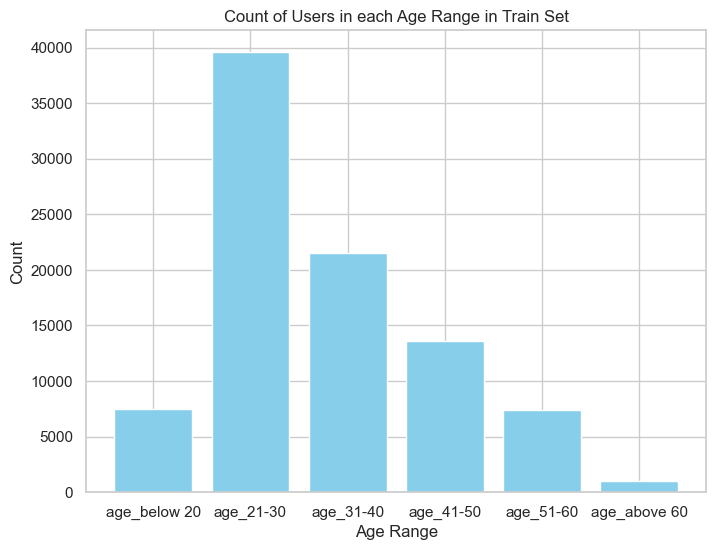

In [44]:
ages = ["age_below 20","age_21-30","age_31-40","age_41-50","age_51-60","age_above 60"]

sns.set(style="whitegrid")

age_counts = ratings_train[ages].sum()

plt.figure(figsize=(8, 6))
plt.bar(age_counts.index, age_counts.values, color='skyblue')

plt.xlabel('Age Range')
plt.ylabel('Count')
plt.title('Count of Users in each Age Range in Train Set')

plt.show()

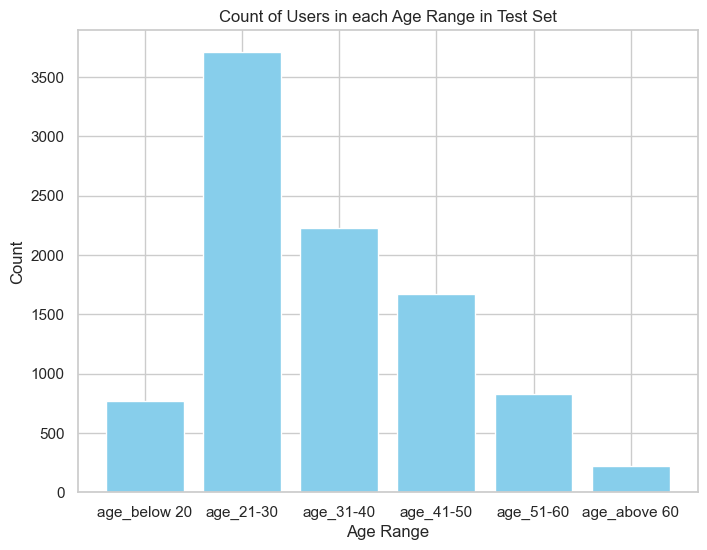

In [45]:
sns.set(style="whitegrid")

age_counts = ratings_test[ages].sum()

plt.figure(figsize=(8, 6))
plt.bar(age_counts.index, age_counts.values, color='skyblue')

plt.xlabel('Age Range')
plt.ylabel('Count')
plt.title('Count of Users in each Age Range in Test Set')

plt.show()

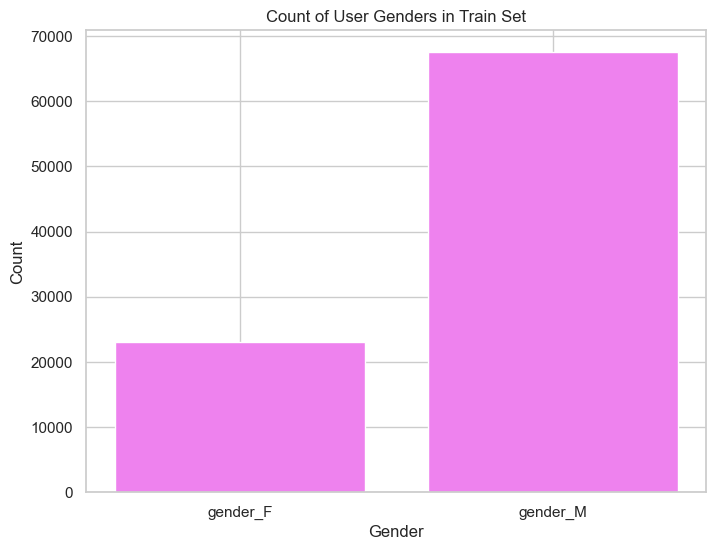

In [46]:
genders = ["gender_F", "gender_M"]

sns.set(style="whitegrid")

gender_counts = ratings_train[genders].sum()

plt.figure(figsize=(8, 6))
plt.bar(gender_counts.index, gender_counts.values, color='violet')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of User Genders in Train Set')

plt.show()

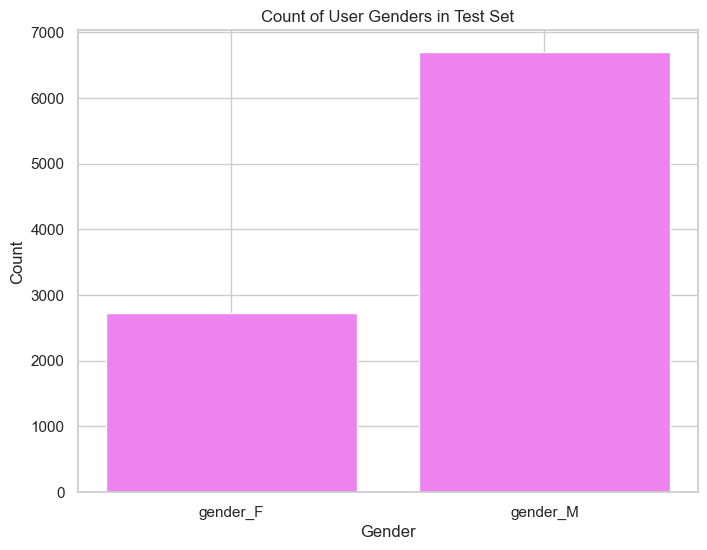

In [47]:
sns.set(style="whitegrid")

gender_counts = ratings_test[genders].sum()

plt.figure(figsize=(8, 6))
plt.bar(gender_counts.index, gender_counts.values, color='violet')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of User Genders in Test Set')

plt.show()

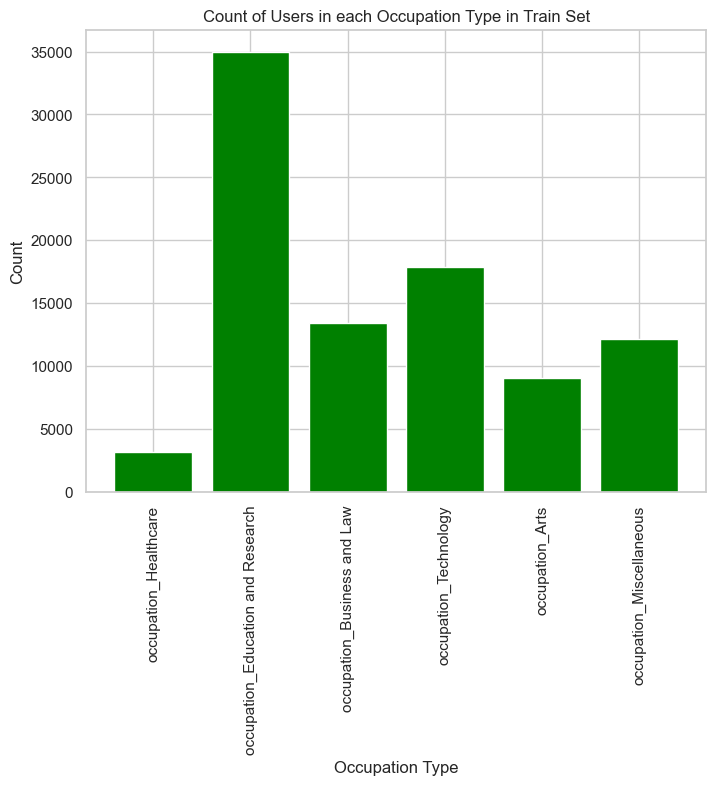

In [48]:
occupations = ["occupation_Healthcare", "occupation_Education and Research", 
               "occupation_Business and Law", "occupation_Technology", 
               "occupation_Arts", "occupation_Miscellaneous"]

sns.set(style="whitegrid")

occupation_counts = ratings_train[occupations].sum()

plt.figure(figsize=(8, 6))
plt.bar(occupation_counts.index, occupation_counts.values, color='green')

plt.xlabel('Occupation Type')
plt.ylabel('Count')
plt.title('Count of Users in each Occupation Type in Train Set')

plt.xticks(rotation=90)
plt.show()

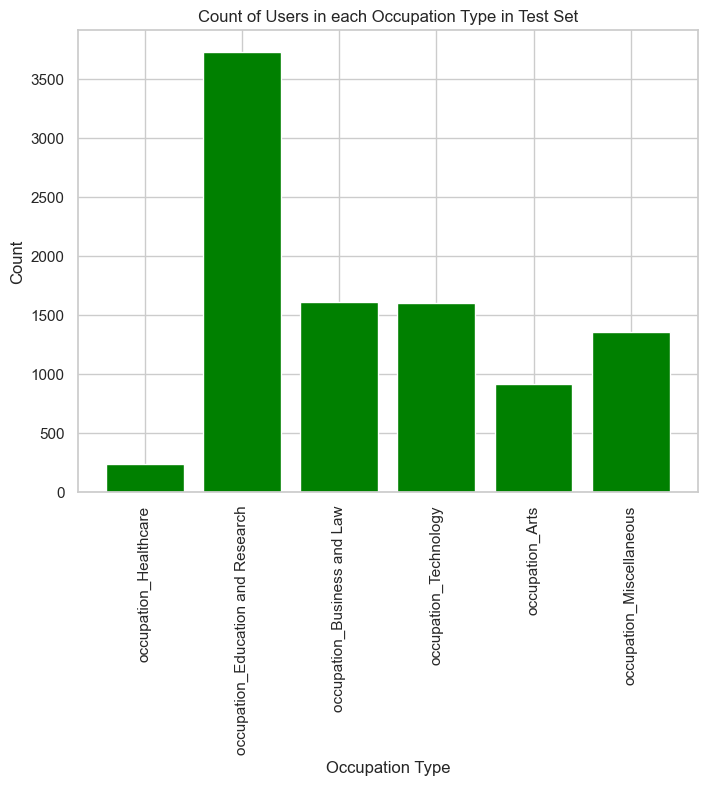

In [49]:
sns.set(style="whitegrid")

occupation_counts = ratings_test[occupations].sum()

plt.figure(figsize=(8, 6))
plt.bar(occupation_counts.index, occupation_counts.values, color='green')

plt.xlabel('Occupation Type')
plt.ylabel('Count')
plt.title('Count of Users in each Occupation Type in Test Set')

plt.xticks(rotation=90)
plt.show()

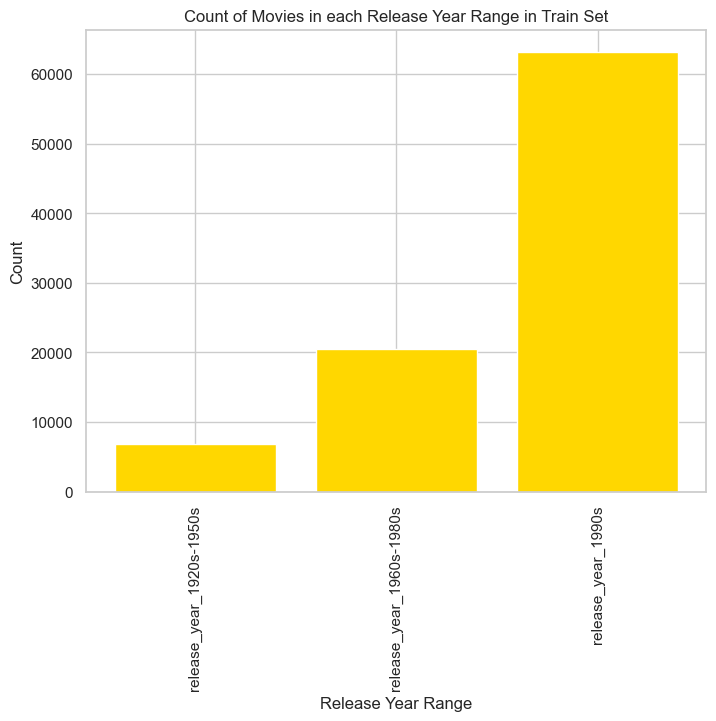

In [50]:
release_years = ["release_year_1920s-1950s", "release_year_1960s-1980s", "release_year_1990s"]

sns.set(style="whitegrid")

year_counts = ratings_train[release_years].sum()

plt.figure(figsize=(8, 6))
plt.bar(year_counts.index, year_counts.values, color='gold')

plt.xlabel('Release Year Range')
plt.ylabel('Count')
plt.title('Count of Movies in each Release Year Range in Train Set')

plt.xticks(rotation=90)
plt.show()

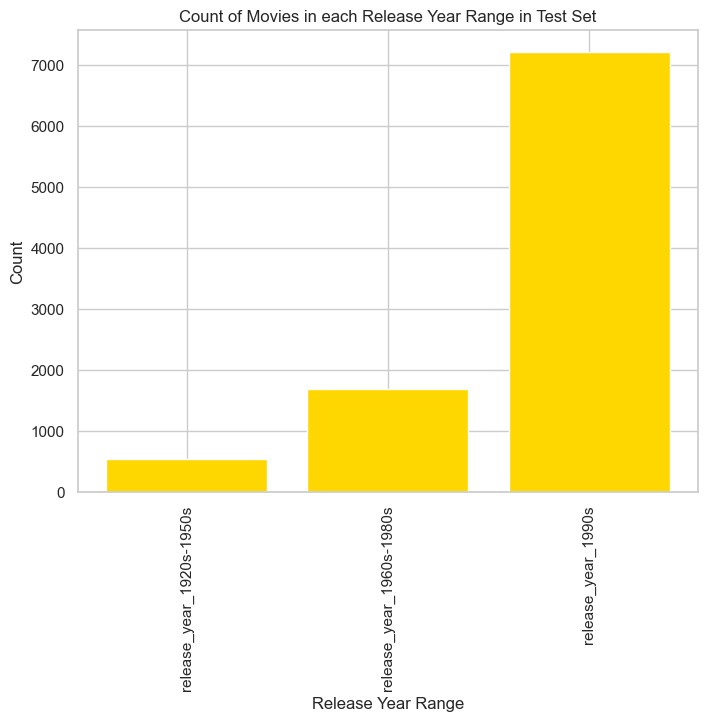

In [51]:
sns.set(style="whitegrid")

year_counts = ratings_test[release_years].sum()

plt.figure(figsize=(8, 6))
plt.bar(year_counts.index, year_counts.values, color='gold')

plt.xlabel('Release Year Range')
plt.ylabel('Count')
plt.title('Count of Movies in each Release Year Range in Test Set')

plt.xticks(rotation=90)
plt.show()

## Setting up X_train, y_train, X_test and y_test

<span style="color: blue;">Part 1:</span> Separate the target variable ('rating') from the <code>ratings_train</code> dataset and assign it to <code>y_train</code>. Assign the rest to <code>X_train</code>.

In [52]:
X_train = ratings_train.drop("rating" , axis=1)
y_train = ratings_train['rating']

X_train.shape

(90570, 36)

<span style="color: blue;">Part 2:</span> Separate the target variable ('rating') from the <code>ratings_test</code> dataset and assign it to <code>y_test</code>. Assign the rest to <code>X_test</code>.

In [53]:
X_test = ratings_test.drop("rating" , axis=1)
y_test = ratings_test['rating']

X_test.shape

(9430, 36)

## Modelling

<span style="color: blue;">Part 1:</span> Build a SVM model with <code>kernel = linear</code>.

In [54]:
# Create a linear SVM classifier
from sklearn.svm import SVC
#svc = SVC(kernel='linear',  probability=True, random_state=27)

# Fit the model on the training data
#svc.fit(X_train, y_train)

In [55]:
import joblib

#joblib.dump(svc, 'svm_linear.pkl')

In [56]:
loaded_svm_linear = joblib.load('svm_linear.pkl')

In [57]:
y_pred_linear = loaded_svm_linear.predict(X_test)

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

test_accuracy_linear = accuracy_score(y_test, y_pred_linear)
test_precision_linear = precision_score(y_test, y_pred_linear)
test_recall_linear = recall_score(y_test, y_pred_linear)
test_f1_linear = f1_score(y_test, y_pred_linear)

print("Test Accuracy for simple SVM model with kernel = linear:", test_accuracy_linear)
print("Test Precision for simple SVM model with kernel = linear:", test_precision_linear)
print("Test Recall for simple SVM model with kernel = linear:", test_recall_linear)
print("Test F1-score for simple SVM model with kernel = linear:", test_f1_linear)

Test Accuracy for simple SVM model with kernel = linear: 0.5960763520678685
Test Precision for simple SVM model with kernel = linear: 0.643598615916955
Test Recall for simple SVM model with kernel = linear: 0.68019747668678
Test F1-score for simple SVM model with kernel = linear: 0.6613921237443328


In [59]:
print(classification_report(y_test, y_pred_linear))

              precision    recall  f1-score   support

           0       0.52      0.48      0.50      3961
           1       0.64      0.68      0.66      5469

    accuracy                           0.60      9430
   macro avg       0.58      0.58      0.58      9430
weighted avg       0.59      0.60      0.59      9430



<span style="color: blue;">Question:</span> Calcualte threshold again based on the lift value

In [60]:
y_svc_pred2 = loaded_svm_linear.predict_proba(X_test)

res = pd.DataFrame(np.column_stack((y_test, y_svc_pred2)), columns=['Target','PR_0', 'PR_1'])
res['scr_grp'] = pd.qcut(res['PR_0'], 10, labels=False)+1
crt = pd.crosstab(res.scr_grp, res.Target).reset_index()
crt = crt.rename(columns= {'Target':'Np',0.0: 'Negatives', 1.0: 'Positives'})
G = crt['Positives'].sum()
B = crt['Negatives'].sum()
avg_resp_rate = G/(G+B)
crt['resp_rate'] = round(crt['Positives']/(crt['Positives']+crt['Negatives']),2)
crt['lift'] = round((crt['resp_rate']/avg_resp_rate),2)
print(crt)

Target  scr_grp  Negatives  Positives  resp_rate  lift
0             1        273        670       0.71  1.22
1             2        317        626       0.66  1.14
2             3        351        597       0.63  1.09
3             4        337        612       0.64  1.10
4             5        334        598       0.64  1.10
5             6        562        727       0.56  0.97
6             7        269        334       0.55  0.95
7             8        488        462       0.49  0.84
8             9        496        447       0.47  0.81
9            10        534        396       0.43  0.74


<span style="color: blue;">Question:</span> Use the threshold based on Youden's index and obtain classification report again.

In [61]:
# using the optimal cutoff point of the ROC curve of svm-linear model (Youden's index)
from sklearn.metrics import roc_curve

# Calculate the false positive rate and true positive rate at various threshold settings
fpr, tpr, thresholds = roc_curve(y_test, y_svc_pred2[:,1])

# Calculate the Youden index at each threshold setting
j_scores = tpr - fpr

# Find the threshold setting that maximizes the Youden index
optimal_idx = np.argmax(j_scores)
optimal_threshold = thresholds[optimal_idx]
print("Optimal Threshold for simple SVM model with kerner = linear: ",optimal_threshold)

Optimal Threshold for simple SVM model with kerner = linear:  0.5354201110676903


In [62]:
threshold = optimal_threshold
preds = np.where(y_svc_pred2[:,1] > threshold, 1, 0)

In [63]:
test_accuracy_linear_opt = accuracy_score(y_test, preds)
test_precision_linear_opt = precision_score(y_test, preds)
test_recall_linear_opt = recall_score(y_test, preds)
test_f1_linear_opt = f1_score(y_test, preds)

print("Test Accuracy for simple SVM model with kernel = linear, using optimal threshold: ", test_accuracy_linear_opt)
print("Test Precision for simple SVM model with kernel = linear, using optimal threshold: ", test_precision_linear_opt)
print("Test Recall for simple SVM model with kernel = linear, using optimal threshold: ", test_recall_linear_opt)
print("Test F1-score for simple SVM model with kernel = linear, using optimal threshold: ", test_f1_linear_opt)

Test Accuracy for simple SVM model with kernel = linear, using optimal threshold:  0.5879109225874868
Test Precision for simple SVM model with kernel = linear, using optimal threshold:  0.6526518804243009
Test Recall for simple SVM model with kernel = linear, using optimal threshold:  0.6187602852441031
Test F1-score for simple SVM model with kernel = linear, using optimal threshold:  0.6352543645579124


In [64]:
print("New classification report for simple SVM model with kernel = linear, using optimal threshold")
print(classification_report(y_test  , preds))

New classification report for simple SVM model with kernel = linear, using optimal threshold
              precision    recall  f1-score   support

           0       0.51      0.55      0.53      3961
           1       0.65      0.62      0.64      5469

    accuracy                           0.59      9430
   macro avg       0.58      0.58      0.58      9430
weighted avg       0.59      0.59      0.59      9430



<span style="color: blue;">Part 2:</span> Build a SVM model with <code>kernel = rbf</code>, <code>gamma = 0.001</code> and <code>C = 1.0</code>.

In [65]:
#from sklearn.svm import SVC

# Create an SVM classifier with RBF kernel
#svc_rbf = SVC(kernel='rbf', gamma=0.001, C=1.0, probability=True)

# Fit the model on the training data
#svc_rbf.fit(X_train, y_train)

In [66]:
#joblib.dump(svc_rbf, 'svm_rbf.pkl')

In [67]:
loaded_svm_rbf = joblib.load('svm_rbf.pkl')

In [68]:
y_pred_rbf = loaded_svm_rbf.predict(X_test)

In [69]:
test_accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
test_precision_rbf = precision_score(y_test, y_pred_rbf)
test_recall_rbf = recall_score(y_test, y_pred_rbf)
test_f1_rbf = f1_score(y_test, y_pred_rbf)

print("Test Accuracy for simple SVM model with kernel = rbf:", test_accuracy_rbf)
print("Test Precision for simple SVM model with kernel = rbf:", test_precision_rbf)
print("Test Recall for simple SVM model with kernel = rbf:", test_recall_rbf)
print("Test F1-score for simple SVM model with kernel = rbf:", test_f1_rbf)

Test Accuracy for simple SVM model with kernel = rbf: 0.5920466595970307
Test Precision for simple SVM model with kernel = rbf: 0.6383015006821282
Test Recall for simple SVM model with kernel = rbf: 0.6844029987200585
Test F1-score for simple SVM model with kernel = rbf: 0.6605488396717552


In [70]:
print (classification_report(y_test, y_pred_rbf))

              precision    recall  f1-score   support

           0       0.52      0.46      0.49      3961
           1       0.64      0.68      0.66      5469

    accuracy                           0.59      9430
   macro avg       0.58      0.57      0.57      9430
weighted avg       0.59      0.59      0.59      9430



Calcualte threshold again based on the lift value

In [71]:
y_svc_pred2_rbf = loaded_svm_rbf.predict_proba(X_test)
res_rbf = pd.DataFrame(np.column_stack((y_test, y_svc_pred2_rbf)), columns=['Target','PR_0', 'PR_1'])
res_rbf['scr_grp'] = pd.qcut(res_rbf['PR_0'].rank(method='first'), 10, labels=False)+1
crt_rbf = pd.crosstab(res_rbf.scr_grp, res_rbf.Target).reset_index()
crt_rbf = crt_rbf.rename(columns= {'Target':'Np',0.0: 'Negatives', 1.0: 'Positives'})
G_rbf = crt_rbf['Positives'].sum()
B_rbf = crt_rbf['Negatives'].sum()
avg_resp_rate_rbf = G_rbf/(G_rbf+B_rbf)
crt_rbf['resp_rate'] = round(crt_rbf['Positives']/(crt_rbf['Positives']+crt_rbf['Negatives']),2)
crt_rbf['lift'] = round((crt_rbf['resp_rate']/avg_resp_rate_rbf),2)
print(crt_rbf)

Target  scr_grp  Negatives  Positives  resp_rate  lift
0             1        274        669       0.71  1.22
1             2        317        626       0.66  1.14
2             3        349        594       0.63  1.09
3             4        338        605       0.64  1.10
4             5        352        591       0.63  1.09
5             6        395        548       0.58  1.00
6             7        427        516       0.55  0.95
7             8        481        462       0.49  0.84
8             9        474        469       0.50  0.86
9            10        554        389       0.41  0.71


Use the threshold based on Youden's index and obtain classification report again.

In [72]:
from sklearn.metrics import roc_curve
fpr_rbf, tpr_rbf, thresholds_rbf = roc_curve(y_test, y_svc_pred2_rbf[:,1])
j_scores_rbf = tpr_rbf - fpr_rbf
optimal_idx_rbf = np.argmax(j_scores_rbf)
optimal_threshold_rbf = thresholds_rbf[optimal_idx_rbf]
print("Optimal Threshold for simple SVM model with kerner = rbf: ", optimal_threshold_rbf)

Optimal Threshold for simple SVM model with kerner = rbf:  0.5405490792797576


In [73]:
preds_rbf = np.where(y_svc_pred2_rbf[:,1] > optimal_threshold_rbf, 1, 0)

In [74]:
test_accuracy_rbf_opt = accuracy_score(y_test, preds_rbf)
test_precision_rbf_opt = precision_score(y_test, preds_rbf)
test_recall_rbf_opt = recall_score(y_test, preds_rbf)
test_f1_rbf_opt = f1_score(y_test, preds_rbf)

print("Test Accuracy for simple SVM model with kernel = rbf, using optimal threshold: ", test_accuracy_rbf_opt)
print("Test Precision for simple SVM model with kernel = rbf, using optimal threshold: ", test_precision_rbf_opt)
print("Test Recall for simple SVM model with kernel = rbf, using optimal threshold: ", test_recall_rbf_opt)
print("Test F1-score for simple SVM model with kernel = rbf, using optimal threshold: ", test_f1_rbf_opt)

Test Accuracy for simple SVM model with kernel = rbf, using optimal threshold:  0.5826086956521739
Test Precision for simple SVM model with kernel = rbf, using optimal threshold:  0.6531468531468532
Test Recall for simple SVM model with kernel = rbf, using optimal threshold:  0.5977326750777108
Test F1-score for simple SVM model with kernel = rbf, using optimal threshold:  0.6242123353064732


In [75]:
print("New classification report for simple SVM model with kernel = rbf, using optimal threshold")
print(classification_report(y_test, preds_rbf))

New classification report for simple SVM model with kernel = rbf, using optimal threshold
              precision    recall  f1-score   support

           0       0.50      0.56      0.53      3961
           1       0.65      0.60      0.62      5469

    accuracy                           0.58      9430
   macro avg       0.58      0.58      0.58      9430
weighted avg       0.59      0.58      0.58      9430



<span style="color: blue;">Part 3:</span> Hyperparameter tuning for the SVM model with <code>RandomizedSearchCV</code><br><br>


We will attempt to tune based on a given set of parameters on <code>C</code>, <code>kernel</code> and <code>gamma</code> with <code>scoring</code> = <b>f1</b>.

In [76]:
#param_grid_f1 = {
#    'C': [0.1, 1],
#    'kernel': ['linear', 'poly', 'rbf'],
#    'gamma': [0.01, 0.1]
#}

#svm_f1 = SVC()

#from sklearn.metrics import accuracy_score
#from sklearn.model_selection import RandomizedSearchCV
#random_search_f1 = RandomizedSearchCV(svm_f1, param_distributions=param_grid_f1, n_iter=5, scoring='f1', cv=5, n_jobs=1, random_state=42)
#random_search_f1.fit(X_train, y_train)

In [77]:
#joblib.dump(random_search_f1, 'random_search_results_f1.pkl')

In [78]:
loaded_random_search_f1 = joblib.load('random_search_results_f1.pkl')

best_params_f1 = loaded_random_search_f1.best_params_
print(best_params_f1)

{'kernel': 'rbf', 'gamma': 0.1, 'C': 0.1}


Lastly, we will train a model with the parameters from this Randomized Search CV with <b>probability = True</b> to see if using optimal threshold can further improve the classification results. 
<br><br>
<span style="color: blue;">Part 4:</span> training a new SVM model with <code>kernel</code> = <b>rbf</b>, <code>gamma</code> = <b>0.1</b>, <code>C</code> = <b>0.1</b> and <code>probability</code> = <b>True</b>.

In [79]:
#svc_f1_proba = SVC(kernel='rbf', gamma=0.1, C=0.1, probability=True)

#svc_f1_proba.fit(X_train, y_train)

In [80]:
#joblib.dump(svc_f1_proba, 'svm_f1_proba.pkl')

In [81]:
loaded_svm_f1_proba = joblib.load('svm_f1_proba.pkl')

In [82]:
y_pred_f1_proba = loaded_svm_f1_proba.predict(X_test)

In [83]:
test_accuracy_f1_proba = accuracy_score(y_test, y_pred_f1_proba)
test_precision_f1_proba = precision_score(y_test, y_pred_f1_proba)
test_recall_f1_proba = recall_score(y_test, y_pred_f1_proba)
test_f1_f1_proba = f1_score(y_test, y_pred_f1_proba)

print("Test Accuracy for tuned SVM model:", test_accuracy_f1_proba)
print("Test Precision for tuned SVM model:", test_precision_f1_proba)
print("Test Recall for tuned SVM model:", test_recall_f1_proba)
print("Test F1-score for tuned SVM model:", test_f1_f1_proba)

Test Accuracy for tuned SVM model: 0.6025450689289502
Test Precision for tuned SVM model: 0.649522154648132
Test Recall for tuned SVM model: 0.6834887547997806
Test F1-score for tuned SVM model: 0.6660727013542409


In [84]:
print (classification_report(y_test, y_pred_f1_proba))

              precision    recall  f1-score   support

           0       0.53      0.49      0.51      3961
           1       0.65      0.68      0.67      5469

    accuracy                           0.60      9430
   macro avg       0.59      0.59      0.59      9430
weighted avg       0.60      0.60      0.60      9430



In [85]:
y_svc_pred2_f1_proba = loaded_svm_f1_proba.predict_proba(X_test)
res_f1_proba = pd.DataFrame(np.column_stack((y_test, y_svc_pred2_f1_proba)), columns=['Target','PR_0', 'PR_1'])
res_f1_proba['scr_grp'] = pd.qcut(res_f1_proba['PR_0'].rank(method='first'), 10, labels=False)+1
crt_f1_proba = pd.crosstab(res_f1_proba.scr_grp, res_f1_proba.Target).reset_index()
crt_f1_proba = crt_f1_proba.rename(columns= {'Target':'Np',0.0: 'Negatives', 1.0: 'Positives'})
G_f1_proba = crt_f1_proba['Positives'].sum()
B_f1_proba = crt_f1_proba['Negatives'].sum()
avg_resp_rate_f1_proba = G_f1_proba/(G_f1_proba+B_f1_proba)
crt_f1_proba['resp_rate'] = round(crt_f1_proba['Positives']/(crt_f1_proba['Positives']+crt_f1_proba['Negatives']),2)
crt_f1_proba['lift'] = round((crt_f1_proba['resp_rate']/avg_resp_rate_f1_proba),2)
print(crt_f1_proba)

Target  scr_grp  Negatives  Positives  resp_rate  lift
0             1        248        695       0.74  1.28
1             2        298        645       0.68  1.17
2             3        316        627       0.66  1.14
3             4        330        613       0.65  1.12
4             5        368        575       0.61  1.05
5             6        421        522       0.55  0.95
6             7        455        488       0.52  0.90
7             8        466        477       0.51  0.88
8             9        485        458       0.49  0.84
9            10        574        369       0.39  0.67


In [86]:
from sklearn.metrics import roc_curve
fpr_f1_proba, tpr_f1_proba, thresholds_f1_proba = roc_curve(y_test, y_svc_pred2_f1_proba[:,1])
j_scores_f1_proba = tpr_f1_proba - fpr_f1_proba
optimal_idx_f1_proba = np.argmax(j_scores_f1_proba)
optimal_threshold_f1_proba = thresholds_f1_proba[optimal_idx_f1_proba]
print("Optimal Threshold for tuned SVM model: ", optimal_threshold_f1_proba)

Optimal Threshold for tuned SVM model:  0.6423141868207545


In [87]:
preds_f1_proba = np.where(y_svc_pred2_f1_proba[:,1] > optimal_threshold_f1_proba, 1, 0)

In [88]:
test_accuracy_f1_proba_opt = accuracy_score(y_test, preds_f1_proba)
test_precision_f1_proba_opt = precision_score(y_test, preds_f1_proba)
test_recall_f1_proba_opt = recall_score(y_test, preds_f1_proba)
test_f1_f1_proba_opt = f1_score(y_test, preds_f1_proba)

print("Test Accuracy for tuned SVM model, using optimal threshold: ", test_accuracy_f1_proba_opt)
print("Test Precision for tuned SVM model, using optimal threshold: ", test_precision_f1_proba_opt)
print("Test Recall for tuned SVM model, using optimal threshold: ", test_recall_f1_proba_opt)
print("Test F1-score for tuned SVM model, using optimal threshold: ", test_f1_f1_proba_opt)

Test Accuracy for tuned SVM model, using optimal threshold:  0.5804878048780487
Test Precision for tuned SVM model, using optimal threshold:  0.6818946862226497
Test Recall for tuned SVM model, using optimal threshold:  0.518559151581642
Test F1-score for tuned SVM model, using optimal threshold:  0.58911508101371


In [89]:
print("New classification report for tuned SVM model, using optimal threshold")
print(classification_report(y_test, preds_f1_proba))

New classification report for tuned SVM model, using optimal threshold
              precision    recall  f1-score   support

           0       0.50      0.67      0.57      3961
           1       0.68      0.52      0.59      5469

    accuracy                           0.58      9430
   macro avg       0.59      0.59      0.58      9430
weighted avg       0.61      0.58      0.58      9430

